# Globular Cluster Stream Generation

From [Hilker et al. 2019](https://arxiv.org/abs/1908.02778), which is cataloged in [Baumgardt's database](https://people.smp.uq.edu.au/HolgerBaumgardt/globular/). They have three main tables,
1. [Mean radial velocities, proper motions and orbital parameters for MW globular clusters](https://people.smp.uq.edu.au/HolgerBaumgardt/globular/orbits.html)
2. [Masses and structural parameters for MW globular clusters](https://people.smp.uq.edu.au/HolgerBaumgardt/globular/parameter.html)
3. [Radial velocities, proper motions and structural parameters for Local Group star clusters](https://people.smp.uq.edu.au/HolgerBaumgardt/globular/lgclusters/parameter.html)

Since we will simulate their orbits for MW globular clusters, we will use the first and second tables. The first table contains the mean radial velocities, proper motions, and orbital parameters for MW globular clusters. The second table contains the masses for MW globular clusters.

## 1. Data Preprocessing

First, we clean the data and header. The cleaned files are renamed manually as `mw_gc_orbits.txt` and `mw_gc_masses.txt`, which previously named `orbit_table.txt` and `combined_table.txt`, respectively. This was done to avoid confusion with the original data.

We copied the header (columns and units) and put them into metadata files. The metadata files are saved as `mw_gc_orbits_metadata.txt` and `mw_gc_masses_metadata.txt`.

### Combining Two Files

In [1]:
import pandas as pd
from astropy.table import Table
import numpy as np

mw_gc_orbit_params_df = pd.read_csv('mw_gc_orbits.txt', sep='\s+')

In [2]:
mw_gc_orbit_params_df

,Cluster,RA,DEC,l,b,Rsun,Delta_R,R_GC,<RV>,ERV,...,U,Delta_U,V,Delta_V,W,Delta_W,R_Per,Delta_R.1,R_Apo,Delta_R.2
0,NGC_104,6.023792,-72.081306,305.895,-44.889,4.52,0.03,7.52,-17.45,0.16,...,77.52,0.17,170.83,0.17,46.02,0.17,5.47,0.01,7.51,0.00
1,NGC_288,13.188500,-26.582611,151.285,-89.380,8.99,0.09,12.21,-44.45,0.13,...,4.20,0.15,-48.34,0.16,50.29,0.13,1.93,0.10,12.34,0.07
2,NGC_362,15.809416,-70.848778,301.533,-46.247,8.83,0.10,9.62,223.12,0.28,...,93.45,0.36,-98.32,0.33,-67.93,0.32,0.73,0.06,11.84,0.13
3,Whiting_1,30.737499,-3.252778,161.618,-60.636,30.59,1.17,35.15,-130.41,1.79,...,-246.96,6.29,32.88,6.60,-7.97,3.57,35.15,1.12,61.94,4.86
4,NGC_1261,48.067543,-55.216225,270.539,-52.124,16.40,0.19,18.28,71.34,0.21,...,-78.82,0.70,57.52,0.57,68.81,0.46,1.65,0.06,21.08,0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,NGC_7089,323.362579,-0.823250,53.371,-35.770,11.69,0.11,10.54,-3.78,0.30,...,73.27,0.47,146.63,0.42,-173.80,0.45,0.88,0.06,18.74,0.22
161,NGC_7099,325.092133,-23.179861,27.179,-46.835,8.46,0.09,7.36,-185.19,0.17,...,1.80,0.27,-80.48,0.29,107.84,0.25,1.51,0.01,8.56,0.08
162,Pal_12,326.661804,-21.252611,30.510,-47.682,18.49,0.30,15.28,27.91,0.28,...,-327.57,0.92,18.08,0.96,109.51,0.77,15.30,0.27,51.25,3.55
163,Pal_13,346.685190,12.771539,87.103,-42.700,23.48,0.40,24.57,25.30,0.22,...,161.51,4.18,216.80,2.57,-77.87,2.82,6.91,0.34,58.24,1.76


In [3]:
mw_gc_masses_df = pd.read_csv('mw_gc_masses.txt', sep='\s+')

In [4]:
mw_gc_masses_df.head()

,Cluster,RA,DEC,R_Sun,DRSun,R_GC,DRGC,N_RV,N_PM,Mass,...,M_High,MF,Delta_MF,sig0,vesc,etac,etah,A_Rot,Delta_AR,P_Rot
0,NGC_104,6.02379,-72.08131,4.52,0.03,7.52,0.01,7177,27460,853000.0,...,0.86,-0.65,0.12,11.9,47.4,-0.40,-0.04,5.00,0.32,100.0
1,NGC_288,13.18850,-26.58261,8.99,0.09,12.21,0.06,549,2637,96200.0,...,0.82,-0.66,0.11,3.1,10.9,-0.31,-0.10,0.42,0.32,84.3
2,NGC_362,15.80942,-70.84878,8.83,0.10,9.62,0.06,2342,4286,252000.0,...,0.82,-0.76,0.13,8.6,34.0,-0.38,-0.11,0.51,0.56,53.0
3,Whiting_1,30.73750,-3.25278,30.59,1.17,35.15,1.11,3,0,1370.0,...,0.99,-1.16,0.60,0.3,1.1,-0.16,-0.03,NaN,NaN,NaN
4,NGC_1261,48.06754,-55.21622,16.40,0.19,18.28,0.17,345,3179,172000.0,...,0.83,-0.61,0.13,5.7,21.4,-0.34,-0.11,0.90,0.64,86.9


In [5]:
# See Cluster which not in both dataframes
print("Clusters in orbits file but not in masses file:")
print(set(mw_gc_masses_df['Cluster']) - set(mw_gc_orbit_params_df['Cluster']))
print("Clusters in masses file but not in orbits file:")
print(set(mw_gc_orbit_params_df['Cluster']) - set(mw_gc_masses_df['Cluster']))

Clusters in orbits file but not in masses file:
{'RLGC_2', 'RLGC_1'}
Clusters in masses file but not in orbits file:
set()


In [6]:
mw_gc_params_df = mw_gc_orbit_params_df.copy()
mw_gc_params_df['Mass'] = mw_gc_params_df['Cluster'].map(mw_gc_masses_df.set_index('Cluster')['Mass'])
mw_gc_params_df['rc'] = mw_gc_params_df['Cluster'].map(mw_gc_masses_df.set_index('Cluster')['rc'])
mw_gc_params_df['rt'] = mw_gc_params_df['Cluster'].map(mw_gc_masses_df.set_index('Cluster')['rt'])

Actually in Baumgardt's database, the X is in opposite direction. We need to multiply it by -1 since it will cause a problem when we convert it to Cartesian coordinates. We will combine the two files into one file.

Multiply by -1,

In [7]:
mw_gc_params_df['X'] = -1 * mw_gc_params_df['X']
mw_gc_params_df['U'] = -1 * mw_gc_params_df['U']

## 2. Generate Globular Cluster Orbits

To generate orbit, we will use `Agama` package. For a walkthrough, we will use one object, `Pal 5` since the observation of the stream is already presented in [Bonaca et al., 2020](https://iopscience.iop.org/article/10.3847/1538-4357/ab5afe/pdf) We want to confirm the result using `Gala`. Since there are already available galactocentric coordinates, we will use them to generate the orbit.

To initiate the Milky Way potential, we use [Bovy et al., 2016](https://iopscience.iop.org/article/10.3847/1538-4357/833/1/31) potential from observation of GD1 and Pal5.

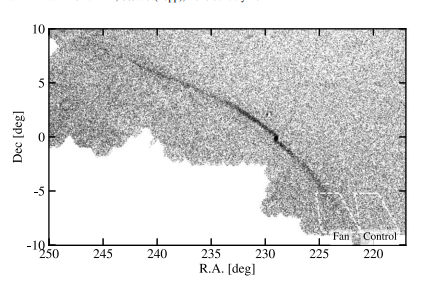

Image: Bonaca et al., 2020

In [8]:
import gala.potential as gp
import gala.dynamics as gd
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord, Galactocentric, ICRS


In [9]:
mw_potential = gp.MilkyWayPotential()
timescale = np.linspace(0, -0.5, 1000) * u.Gyr

In [10]:
pal5_ra = mw_gc_params_df[mw_gc_params_df["Cluster"] == "Pal_5"]["RA"].values[0]
pal5_dec = mw_gc_params_df[mw_gc_params_df["Cluster"] == "Pal_5"]["DEC"].values[0]
pal5_rsun = mw_gc_params_df[mw_gc_params_df["Cluster"] == "Pal_5"]["Rsun"].values[0]
pal5_pmra = mw_gc_params_df[mw_gc_params_df["Cluster"] == "Pal_5"]["mualpha"].values[0]
pal5_pmdec = mw_gc_params_df[mw_gc_params_df["Cluster"] == "Pal_5"]["mu_delta"].values[0]
pal5_vrad = mw_gc_params_df[mw_gc_params_df["Cluster"] == "Pal_5"]["<RV>"].values[0]

example_icrs = SkyCoord(ra=pal5_ra*u.deg,
                      dec=pal5_dec*u.deg,
                      distance=pal5_rsun*u.kpc,
                      pm_ra_cosdec=pal5_pmra*u.mas/u.yr,
                      pm_dec=pal5_pmdec*u.mas/u.yr,
                      radial_velocity=pal5_vrad*u.km/u.s)

obj_galcen = example_icrs.transform_to(Galactocentric)

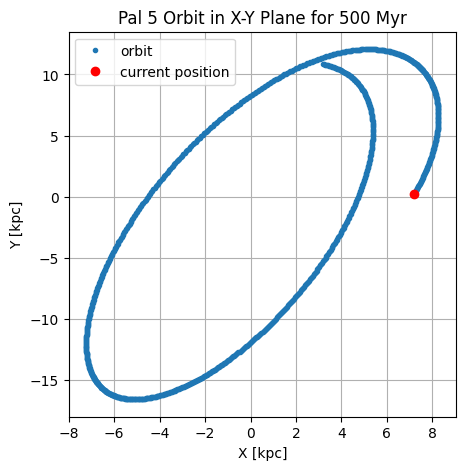

In [11]:
obj_w0 = gd.PhaseSpacePosition(obj_galcen.data)
obj_orbit = mw_potential.integrate_orbit(obj_w0, t=timescale)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(obj_orbit.x, obj_orbit.y, marker='.', linestyle='none', label='orbit')
ax.plot(obj_orbit.x[0], obj_orbit.y[0], marker='o', color='r', linestyle='none', label='current position')
ax.set_xlabel('X [kpc]')
ax.set_ylabel('Y [kpc]')
ax.set_title('Pal 5 Orbit in X-Y Plane for 500 Myr')
ax.grid()
ax.legend()

In [12]:
from astropy.coordinates import SkyCoord, Galactocentric, CartesianDifferential, CartesianRepresentation

def galactocentric_to_icrs(x, y, z, vx, vy, vz):

    galactocentric_frame = Galactocentric(
        galcen_distance=8.35 * u.kpc, # Griv et al. 2021
        z_sun= 10 * u.pc # Griv et al. 2021
    )

    # Define the Galactocentric frame parameters
    # Do heliocentric correction
    galcen_distance = 8.35 * u.kpc # Griv et al 2021
    z_sun = 10 * u.pc # Griv et al 2021
    pm_gal_sgrA = [-6.411, -0.219] * u.mas / u.yr  # Reid & Brunthaler 2020

    # Convert proper motion of Sgr A* into velocity components
    v_x_sun = 11.1 * u.km / u.s
    v_y_sun = 244 * u.km / u.s
    v_z_sun = 7.25 * u.km / u.s
    v_sun = [v_x_sun, v_y_sun, v_z_sun] # From astropy docs
    
    galactocentric_frame = Galactocentric(
                        galcen_distance=galcen_distance,
                        galcen_v_sun=CartesianDifferential(v_sun),
                        z_sun=z_sun)
    c = SkyCoord(x=x,
                 y=y,
                 z=z,
                 v_x = vx,
                 v_y = vy,
                 v_z = vz,
                 frame=galactocentric_frame)
    icrs_coord = c.transform_to('icrs')
    return icrs_coord.ra.value, icrs_coord.dec.value, icrs_coord.distance, icrs_coord.radial_velocity


In [13]:
x_orbit = obj_orbit.x
y_orbit = obj_orbit.y
z_orbit = obj_orbit.z

vx_orbit = obj_orbit.v_x
vy_orbit = obj_orbit.v_y
vz_orbit = obj_orbit.v_z

ra_orbit, dec_orbit, distance_orbit, rv = galactocentric_to_icrs(x_orbit, y_orbit, z_orbit, vx_orbit, vy_orbit, vz_orbit)

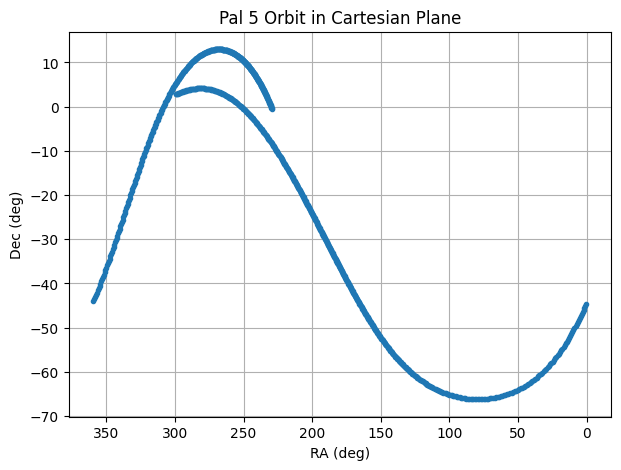

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.plot(ra_orbit, dec_orbit, marker='.', linestyle='none')
ax.set_xlabel('RA (deg)')
ax.set_ylabel('Dec (deg)')
ax.set_title('Pal 5 Orbit in Cartesian Plane')
ax.grid()
ax.invert_xaxis()

In [15]:
import gala.potential as gp
import gala.dynamics as gd
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord, Galactocentric, ICRS


Text(0.5, 1.0, 'Milky Way Mass Profile')

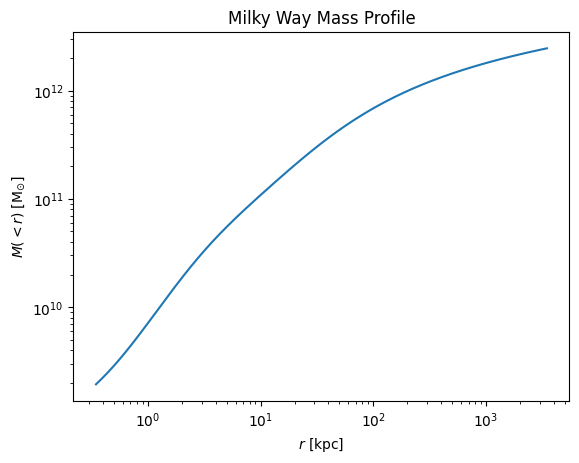

In [16]:
m_profile_mw = gp.MilkyWayPotential()
pos = np.zeros((3,1000)) * u.kpc
pos[0] = np.logspace(np.log10(20./100.), np.log10(20*100.), pos.shape[1]) * u.kpc
pos[1] = np.logspace(np.log10(20./100.), np.log10(20*100.), pos.shape[1]) * u.kpc
pos[2] = np.logspace(np.log10(20./100.), np.log10(20*100.), pos.shape[1]) * u.kpc
dist = np.sqrt(pos[0]**2 + pos[1]**2 + pos[2]**2)
m_profile = m_profile_mw.mass_enclosed(pos)


plt.loglog(dist, m_profile, marker='') 
plt.xlabel("$r$ [{}]".format(pos.unit.to_string(format='latex'))) 
plt.ylabel("$M(<r)$ [{}]".format(m_profile.unit.to_string(format='latex'))) 
plt.title("Milky Way Mass Profile")

In [17]:
import numpy as np
import matplotlib.pyplot as plt

import agama
agama.setUnits(length=1, velocity=1, mass=1)
timeUnitGyr = agama.getUnits()['time'] # time unit is 1 kpc / (1 km/s)

In [18]:
from astropy.coordinates import SkyCoord, Galactocentric, CartesianRepresentation, CartesianDifferential
import astropy.units as u
import numpy as np

def get_observed_coords(xv):
    """
    Convert Galactocentric phase-space coordinates to heliocentric observed coordinates using Astropy.

    Parameters
    ----------
    xv : ndarray of shape (N, 6)
        [X, Y, Z, U, V, W] in kpc and km/s

    Returns
    -------
    ra : deg
    dec : deg
    vlos : km/s
    pmra : mas/yr
    pmdec : mas/yr
    dist : kpc
    """
    # Prepare Galactocentric Cartesian with velocities
    xyz = xv[:, 0:3] * u.kpc
    vxyz = xv[:, 3:6] * u.km/u.s

    pos = CartesianRepresentation(xyz.T)
    vel = CartesianDifferential(vxyz.T)

    galcen_coord = SkyCoord(pos.with_differentials(vel), frame=Galactocentric())

    # Transform to ICRS (RA, Dec, etc.)
    icrs = galcen_coord.transform_to("icrs")

    ra = icrs.ra.deg
    dec = icrs.dec.deg
    rsun = icrs.distance.to(u.kpc).value
    vlos_helio = icrs.radial_velocity.to(u.km/u.s).value
    pmra = icrs.pm_ra_cosdec.to(u.mas/u.yr).value
    pmdec = icrs.pm_dec.to(u.mas/u.yr).value

    return ra, dec, vlos_helio, pmra, pmdec, rsun


In [19]:
pal5_data = mw_gc_params_df[mw_gc_params_df["Cluster"] == "Pal_5"]
pal5_data.columns

Index(['Cluster', 'RA', 'DEC', 'l', 'b', 'Rsun', 'Delta_R', 'R_GC', '<RV>',
       'ERV', 'mualpha', 'Del_mu', 'mu_delta', 'Del_mu.1', 'corr', 'X',
       'Delta_X', 'Y', 'Delta_Y', 'Z', 'Delta_Z', 'U', 'Delta_U', 'V',
       'Delta_V', 'W', 'Delta_W', 'R_Per', 'Delta_R.1', 'R_Apo', 'Delta_R.2',
       'Mass', 'rc', 'rt'],
      dtype='object')

In [27]:
xv = pal5_data[["X", "Y", "Z", "U", "V", "W"]].values
ra, dec, vlos, pmra, pmdec, dist = get_observed_coords(xv)

print("RA:", ra[0], "DEC:", dec[0])
print("RV:", vlos[0], "pmra:", pmra[0], "pmdec:", pmdec[0], "rsun:", dist[0])

print("-----Actual------")
print("RA:", pal5_data["RA"].values[0], pal5_data["DEC"].values[0])
print("RV:", pal5_data["<RV>"].values[0], "pmra:", pal5_data["mualpha"].values[0], "pmdec:", 
      pal5_data["mu_delta"].values[0], "rsun:", pal5_data["Rsun"].values[0],)


RA: 228.85811113707504 DEC: 0.011448826623860903
RV: -60.08763390528066 pmra: -2.7255949704007594 pmdec: -2.5963075678303715 rsun: 21.882644305452132
-----Actual------
RA: 229.019167 -0.121
RV: -58.61 pmra: -2.754 pmdec: -2.643 rsun: 21.94


## 4. Generate Mock Stream with Chen Stream in Agama

Based on Yingtian Chen particle spray method([Chen et al., 2024](https://iopscience.iop.org/article/10.3847/1538-4365/ad9904))is an improved version of mock stream, which ignore internal cluster dynamics and directly plots particle. The result was similar to previous plot since it was also sampled N-body simulation. The only difference was on the create initial condition function.

In the Chen stream, ini initial condition (at the condition of release) basically
1. Compute tidal radius
2. Assign position and velocities of particles (directions are generated using angles)
3. Create trailing arm
4. Create leading arm


In [28]:
def get_rot_mat(x, y, z, vx, vy, vz):
    """
    Create 
    """
    Lx = y * vz - z * vy
    Ly = z * vx - x * vz
    Lz = x * vy - y * vx
    r = (x*x + y*y + z*z)**0.5
    L = (Lx*Lx + Ly*Ly + Lz*Lz)**0.5
    # rotation matrices transforming from the host to the satellite frame for each point on the trajectory
    R = np.zeros((len(x), 3, 3))
    R[:,0,0] = x/r
    R[:,0,1] = y/r
    R[:,0,2] = z/r
    R[:,2,0] = Lx/L
    R[:,2,1] = Ly/L
    R[:,2,2] = Lz/L
    R[:,1,0] = R[:,0,2] * R[:,2,1] - R[:,0,1] * R[:,2,2]
    R[:,1,1] = R[:,0,0] * R[:,2,2] - R[:,0,2] * R[:,2,0]
    R[:,1,2] = R[:,0,1] * R[:,2,0] - R[:,0,0] * R[:,2,1]
    return R, L, r

def get_d2Phi_dr2(pot_host, x, y, z):
    # compute  the second derivative of potential by spherical radius
    r = (x*x + y*y + z*z)**0.5
    der = pot_host.forceDeriv(np.column_stack([x,y,z]))[1]
    d2Phi_dr2 = -(x**2  * der[:,0] + y**2  * der[:,1] + z**2  * der[:,2] +
                  2*x*y * der[:,3] + 2*y*z * der[:,4] + 2*z*x * der[:,5]) / r**2
    return d2Phi_dr2

In [29]:
def create_ic_chen24(rng, pot_host, orb_sat, mass_sat):
    N = len(orb_sat)
    x, y, z, vx, vy, vz = orb_sat.T
    R, L, r = get_rot_mat(x, y, z, vx, vy, vz)
    d2Phi_dr2 = get_d2Phi_dr2(pot_host, x, y, z)
    
    # compute the tidal radius at this radius for each point on the trajectory
    Omega = L / r**2
    r_tidal = (agama.G * mass_sat / (Omega**2 - d2Phi_dr2))**(1./3)
    
    # assign positions and velocities (in the satellite reference frame) of particles
    r_tidal = np.repeat(r_tidal, 2)

    mean = np.array([1.6, -30, 0, 1, 20, 0])

    cov = np.array([
        [0.1225,   0,   0, 0, -4.9,   0],
        [     0, 529,   0, 0,    0,   0],
        [     0,   0, 144, 0,    0,   0],
        [     0,   0,   0, 0,    0,   0],
        [  -4.9,   0,   0, 0,  400,   0],
        [     0,   0,   0, 0,    0, 484],
    ])
    
    posvel = rng.multivariate_normal(mean, cov, size=2*N)

    Dr = posvel[:, 0] * r_tidal
    v_esc = np.sqrt(2 * agama.G * mass_sat / Dr)
    Dv = posvel[:, 3] * v_esc

    # convert degrees to radians
    phi = posvel[:, 1] * np.pi / 180
    theta = posvel[:, 2] * np.pi / 180
    alpha = posvel[:, 4] * np.pi / 180
    beta = posvel[:, 5] * np.pi / 180

    dx = Dr * np.cos(theta) * np.cos(phi)
    dy = Dr * np.cos(theta) * np.sin(phi)
    dz = Dr * np.sin(theta)
    dvx = Dv * np.cos(beta) * np.cos(alpha)
    dvy = Dv * np.cos(beta) * np.sin(alpha)
    dvz = Dv * np.sin(beta)

    dq = np.column_stack([dx, dy, dz])
    dp = np.column_stack([dvx, dvy, dvz])
    
    ic_stream = np.tile(orb_sat, 2).reshape(2*N, 6)
    
    # trailing arm
    ic_stream[::2,0:3] += np.einsum('ni,nij->nj', dq[::2], R)
    ic_stream[::2,3:6] += np.einsum('ni,nij->nj', dp[::2], R)
    
    # leading arm
    ic_stream[1::2,0:3] += np.einsum('ni,nij->nj', -dq[1::2], R)
    ic_stream[1::2,3:6] += np.einsum('ni,nij->nj', -dp[1::2], R)

    return ic_stream


In [30]:
def create_stream(create_ic_method, rng, time_total, num_particles, pot_host, posvel_sat, mass_sat, pot_sat=None, **kwargs):
    # integrate the orbit of the progenitor from its present-day posvel (at time t=0)
    # back in time for an interval time_total, storing the trajectory at num_steps points
    # here the potential of satellite can be neglected
    time_sat, orbit_sat = agama.orbit(potential=pot_host, ic=posvel_sat,
        time=time_total, trajsize=num_particles//2)
    # print(f"orbit_sat: {orbit_sat}")

    # plt.plot(orbit_sat[:,0], orbit_sat[:,1])
    
    if time_total < 0:
        # reverse the arrays to make them increasing in time
        time_sat  = time_sat [::-1]
        orbit_sat = orbit_sat[::-1]

    # at each point on the trajectory, create a pair of seed initial conditions
    # for particles released at Lagrange points
    ic_stream = create_ic_method(rng, pot_host, orbit_sat, mass_sat, **kwargs)
    time_seed = np.repeat(time_sat, 2)
    
    if pot_sat is None:
        pot_tot = pot_host
    else:
        # include the progenitor's potential
        traj = np.column_stack([time_sat, orbit_sat])
        pot_traj = agama.Potential(potential=pot_sat, center=traj)
        pot_tot = agama.Potential(pot_host, pot_traj)
        
    xv_stream = np.vstack(agama.orbit(potential=pot_tot,
        ic=ic_stream, time=-time_seed if time_total<0 else time_total-time_seed, timestart=time_seed, trajsize=1)[:,1])
    return time_sat, orbit_sat, xv_stream, ic_stream


In [31]:
pal5_df = mw_gc_params_df[mw_gc_params_df["Cluster"] == "Pal_5"]
pal5_df

pal5_x = pal5_df["X"].values[0]
pal5_y = pal5_df["Y"].values[0]
pal5_z = pal5_df["Z"].values[0]
pal5_vx = pal5_df["U"].values[0]
pal5_vy = pal5_df["V"].values[0]
pal5_vz = pal5_df["W"].values[0]

pal5_rc = pal5_df["Mass"].values[0] / 1000 # in kpc
pal5_mass = pal5_df["Mass"].values[0]

from gala import potential as gp
from gala.units import galactic
import astropy.units as u

pot = agama.GalaPotential("MWPotential2022.ini")
pot_sat = agama.GalaPotential(type='Plummer', mass=pal5_mass, scaleRadius=pal5_rc)
prog_w0 = [pal5_x,pal5_y,pal5_z,pal5_vx,pal5_vy,pal5_vz]
prog_mass = pal5_mass

time_total = -3.0 * 0.978  # in time units (0.978 Gyr)
num_particles = 1000  # number of particles in the stream

%time time_sat_c24, orbit_sat_c24, xv_stream_c24, ic_stream_c24 = \
    create_stream(create_ic_chen24, np.random.default_rng(0), time_total, num_particles, pot, prog_w0, prog_mass)


/tmp/ipykernel_7647/2175080202.py:26: FutureWarning: forceDeriv is deprecated, use Potential.eval(..., der=True) instead
  der = pot_host.forceDeriv(np.column_stack([x,y,z]))[1]
                                           

CPU times: user 1.02 s, sys: 1.58 ms, total: 1.03 s
Wall time: 521 ms


1000 orbits complete (1969 orbits/s)


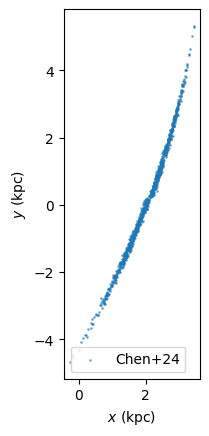

In [32]:
plt.scatter(xv_stream_c24[:,0]-5, xv_stream_c24[:,1], s=1, alpha=0.5, label='Chen+24')
plt.xlabel(r'$x\ ({\rm kpc})$')
plt.ylabel(r'$y\ ({\rm kpc})$')

plt.legend(loc='lower left')
plt.gca().set_aspect(1)
plt.show()

In [34]:
ra, dec, vlos, pmra, pmdec, dist = get_observed_coords(xv_stream_c24)

Text(0, 0.5, '$v_{\\rm los}$ [km/s]')

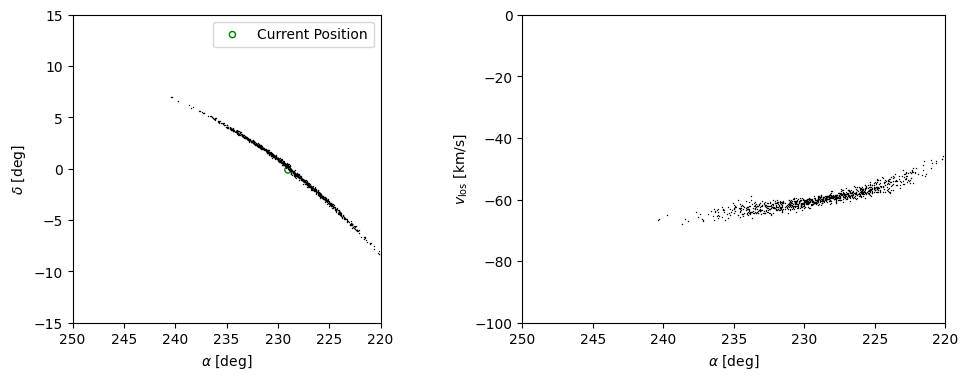

In [35]:
ax = plt.subplots(1, 2, figsize=(12,4))[1]
ax[0].plot(ra, dec, 'ko', ms=1, mew=0)
ax[0].scatter(pal5_df["RA"].values[0], pal5_df["DEC"].values[0], facecolors='none', edgecolors='green', s=20, label='Current Position')
ax[0].set_xlim(250, 220)
ax[0].set_ylim(-15, 15)
ax[0].legend()
ax[0].set_aspect('equal')
ax[0].set_xlabel(r'$\alpha$ [deg]')
ax[0].set_ylabel(r'$\delta$ [deg]')
ax[1].plot(ra, vlos, 'ko', ms=1, mew=0)
ax[1].set_xlim(250, 220)
ax[1].set_ylim(-100, 0)
ax[1].set_xlabel(r'$\alpha$ [deg]')
ax[1].set_ylabel(r'$v_{\rm los}$ [km/s]')


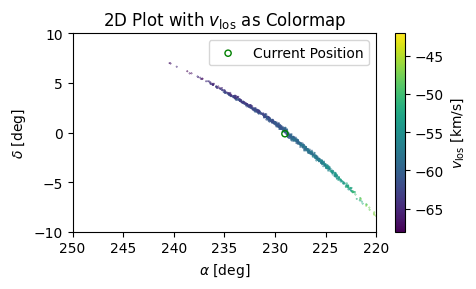

In [36]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 3))
scatter = ax.scatter(ra, dec, c=vlos, cmap='viridis', s=0.1)
gc = ax.scatter(pal5_df["RA"].values[0], pal5_df["DEC"].values[0], 
                facecolors='none', edgecolors='green', s=20, label='Current Position')

ax.set_xlim(250, 220)
ax.set_ylim(-10, 10)
ax.set_xlabel(r'$\alpha$ [deg]')
ax.set_ylabel(r'$\delta$ [deg]')
ax.set_title(r'2D Plot with $v_{\rm los}$ as Colormap')
ax.legend()
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'$v_{\rm los}$ [km/s]')
plt.tight_layout()


In [37]:
dist_modulus_list_c24 = []

for i in range(len(xv_stream_c24)):
    dist = np.sqrt(xv_stream_c24[i][0]**2 + xv_stream_c24[i][1]**2 + xv_stream_c24[i][2]**2)
    dist_modulus = np.log(dist/10)
    dist_modulus_list_c24.append(dist_modulus)

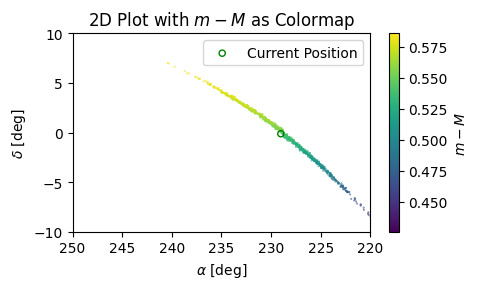

In [38]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 3))
scatter = ax.scatter(ra, dec, c=dist_modulus_list_c24, cmap='viridis', s=0.1)
gc = ax.scatter(pal5_df["RA"].values[0], pal5_df["DEC"].values[0], facecolors='none', edgecolors='green', s=20, label='Current Position')
ax.set_xlim(250, 220)
ax.set_ylim(-10, 10)
ax.set_xlabel(r'$\alpha$ [deg]')
ax.set_ylabel(r'$\delta$ [deg]')
ax.set_title(r'2D Plot with $m-M$ as Colormap')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'$m-M$')
plt.legend()
plt.tight_layout()

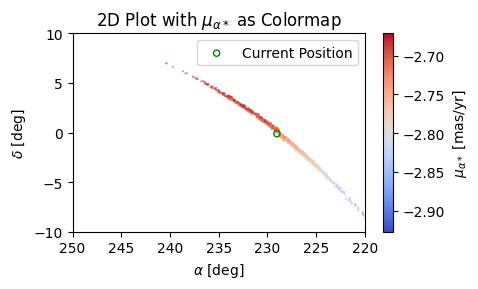

In [39]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 3))

# Plot stream colored by proper motion in RA
scatter = ax.scatter(ra, dec, c=pmra, cmap='coolwarm', s=0.1)

# Mark current GC position
gc = ax.scatter(
    pal5_df["RA"].values[0], pal5_df["DEC"].values[0],
    facecolors='none', edgecolors='green', s=20, label='Current Position'
)

# Axes and labels
ax.set_xlim(250, 220)
ax.set_ylim(-10, 10)
ax.set_xlabel(r'$\alpha$ [deg]')
ax.set_ylabel(r'$\delta$ [deg]')
ax.set_title(r'2D Plot with $\mu_{\alpha*}$ as Colormap')  # mu_alpha*

# Colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'$\mu_{\alpha*}$ [mas/yr]')

# Legend
plt.legend()
plt.tight_layout()
plt.show()


## Comparison

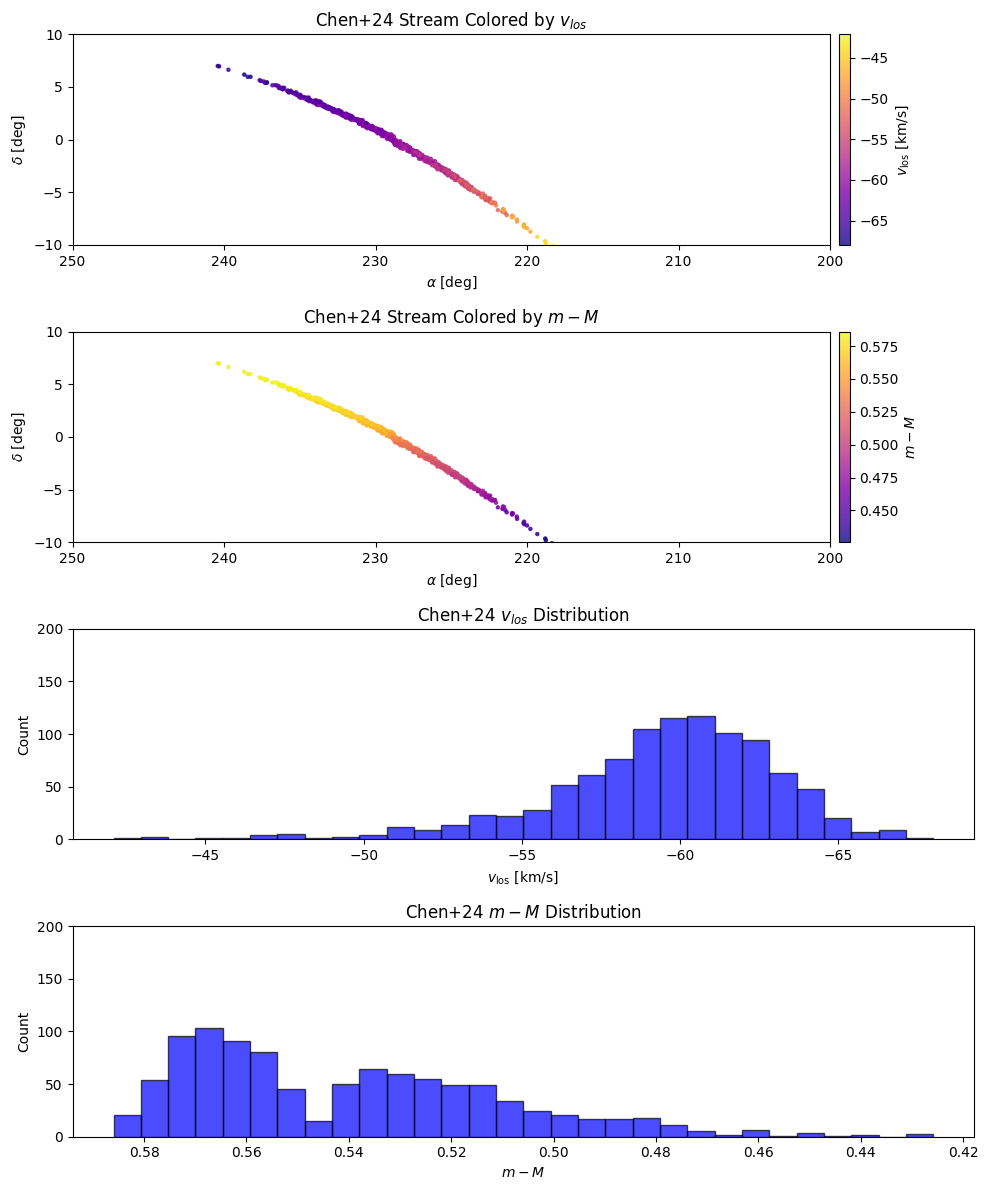

In [44]:
import matplotlib.pyplot as plt

# Create a grid of subplots: 4 rows, 1 column
fig, axes = plt.subplots(4, 1, figsize=(10, 12))

# === 1. RA vs Dec colored by Vlos ===
scatter_chen = axes[0].scatter(
    ra, dec, c=vlos, cmap='plasma', s=5, alpha=0.8
)
axes[0].set_xlim(250, 200)
axes[0].set_ylim(-10, 10)
axes[0].set_xlabel(r'$\alpha$ [deg]')
axes[0].set_ylabel(r'$\delta$ [deg]')
axes[0].set_title('Chen+24 Stream Colored by $v_{los}$')
cbar_chen = fig.colorbar(scatter_chen, ax=axes[0], orientation='vertical', pad=0.01)
cbar_chen.set_label(r'$v_{\rm los}$ [km/s]')

# === 2. RA vs Dec colored by Distance Modulus ===
scatter_chen_dm = axes[1].scatter(
    ra, dec, c=dist_modulus_list_c24, cmap='plasma', s=5, alpha=0.8
)
axes[1].set_xlim(250, 200)
axes[1].set_ylim(-10, 10)
axes[1].set_xlabel(r'$\alpha$ [deg]')
axes[1].set_ylabel(r'$\delta$ [deg]')
axes[1].set_title('Chen+24 Stream Colored by $m - M$')
cbar_d_chen = fig.colorbar(scatter_chen_dm, ax=axes[1], orientation='vertical', pad=0.01)
cbar_d_chen.set_label(r'$m - M$')

# === 3. Histogram of vlos ===
axes[2].hist(vlos, bins=30, color='blue', alpha=0.7, edgecolor='black')
axes[2].set_xlabel(r'$v_{\rm los}$ [km/s]')
axes[2].set_ylabel('Count')
axes[2].set_title('Chen+24 $v_{los}$ Distribution')
axes[2].set_ylim(0, 200)
axes[2].invert_xaxis()

# === 4. Histogram of Distance Modulus ===
axes[3].hist(dist_modulus_list_c24, bins=30, color='blue', alpha=0.7, edgecolor='black')
axes[3].set_xlabel(r'$m - M$')
axes[3].set_ylabel('Count')
axes[3].set_title('Chen+24 $m - M$ Distribution')
axes[3].set_ylim(0, 200)
axes[3].invert_xaxis()

# === Adjust Layout ===
plt.tight_layout()
plt.show()


We can see that there is likely a velocity dispersion difference at the leading trail.